# K-Means Clustering

- Especially useful to quickly discover insights from **unlabeled** data

### K-Means real world applications
- Customer Segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

#### This Example shows
1. K-Means on a random generated dataset
2. How to use K-Means for customer segmentation

### Step 1. Import packages

- library: KMeans from sklearn.cluster

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

### Step 2. K-Means on a randomly generated dataset

In [2]:
# Firstly: set a random seed to 0
np.random.seed(0)

Then: Make random clusters of points by using the **make_blobs** class

- **<u>Input</u>**: 
    - **n_samples**: the total number of points equally divided among clusters
        - Value will be: 5000
    - **centers**: the number of centers to generate, or the fixed center locations
        - Value will be: [[4, 4], [-2, -1], [2, -3], [1, 1]]
    - **cluster_std**: The standard deviation of the clusters
        - Value will be: 0.9

- **<u>Output</u>**:      
    - **X**: Array of shape [n_samples, n_features] (Feature Matrix)
        - the generated samples
    - **y**: Array of shape [n_samples] (Response Vector)
        - The integer labels for cluster membership of each sample

In [3]:
X, y = make_blobs(n_samples = 50000, centers = [[4, 4], [-2, -1], [1, 2]], cluster_std = 0.9)


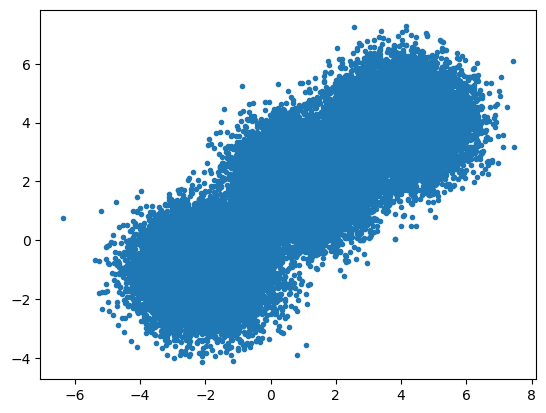

In [4]:
# Display the scatter plot of the randomly generated data
plt.scatter(X[:, 0], X[:, 1], marker = ".")


### Step 3. Setting up K-Means

The KMeans class has many paramters that can be used, such as:
- **init**: Initialization method of the centroids
    - Values will be: "k-means++"
    - k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
- **n_clusters**: The number of clusters to form as well as the number of centroids to generate
    - Value will be: 4 (since we have 4 centers)
- **n_init**: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia
    - Value will be: 12

In [5]:
# Initialize K-Means with these parameters where the output parameter is called k_means
k_means = KMeans(init = "k-means++",
                n_clusters = 4,
                n_init = 12)

In [6]:
# Then fit the KMeans model with the feature matrix X
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [7]:
# labels for each point in the model using KMeans' .labels_attribute
k_means_labels = k_means.labels_
k_means_labels


array([3, 1, 0, ..., 0, 0, 0], dtype=int32)

In [8]:
# Get the coordinates of the cluster centers using KMeans' .cluster_centers_
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers


array([[-2.03868882, -1.0285163 ],
       [ 4.11841098,  4.07800232],
       [ 1.84782644,  2.54309855],
       [ 0.45390357,  1.65356365]])

### Step 4. Creating the Visual Plot
With the random data generated and KMeans mode initialized, plot them below:

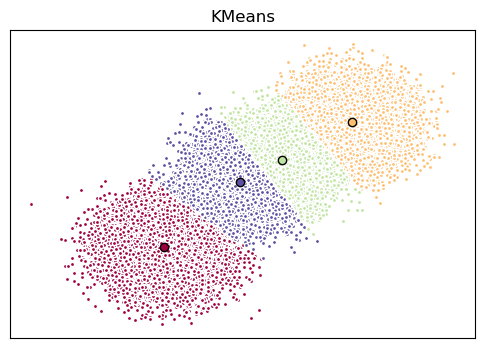

In [11]:
# Initialize the plot with the specified dimensions
fig = plt.figure(figsize = (6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels they are.
# Use set(k_means_labels) to get the unique labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids
# k will range from 0-3, which will match the possible clusters that each data point is in
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    
    # Create a list of all data points, where the data points that are
    # in teh cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center
    cluster_center = k_means_cluster_centers[k]
    
    # Plot the datapoints with color col
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor = col, marker = ".")
    
    # Plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 6)
    
# Title of the plot
ax.set_title("KMeans")

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


### Practice: k = 3

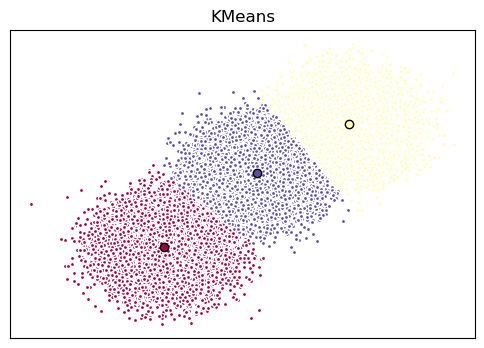

In [12]:
k_means = KMeans(init = "k-means++",
                n_clusters = 3,
                n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

fig = plt.figure(figsize = (6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor = col, marker = ".")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 6)
    
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.show()


# Customer Segmentation with K-Means
### Step 1. Read in the Dataset
- [Download dataset here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv)

In [14]:
# import packages
import pandas as pd
# read in the data csv
cust_df = pd.read_csv("/Users/pc/Desktop/IBM AI Engineer/Machine Learning with Python/Cust_Segmentation.csv")


### Step 2. Preprocessing


In [16]:
df = cust_df.drop("Address", axis = 1)

from sklearn.preprocessing import StandardScaler
X = df.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Step 3. Modelling

In [18]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

### Step 3. Insights

In [19]:
# assign the labels to each row in the dataframe
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [25]:
# Check the centroid values by averaging the features in each cluster
df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


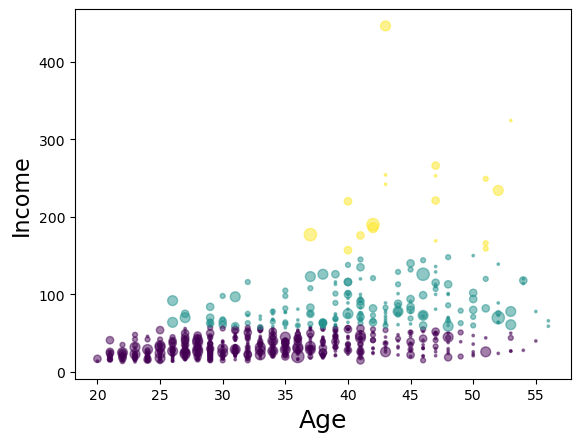

In [26]:
# The distribution of customers based on their age and income
area = np.pi * ( X[:, 1] )**2
plt.scatter(X[:, 0], X[:, 3], s = area, c = labels.astype(float), alpha = 0.5)
plt.xlabel("Age", fontsize = 18)
plt.ylabel("Income", fontsize = 16)
plt.show()


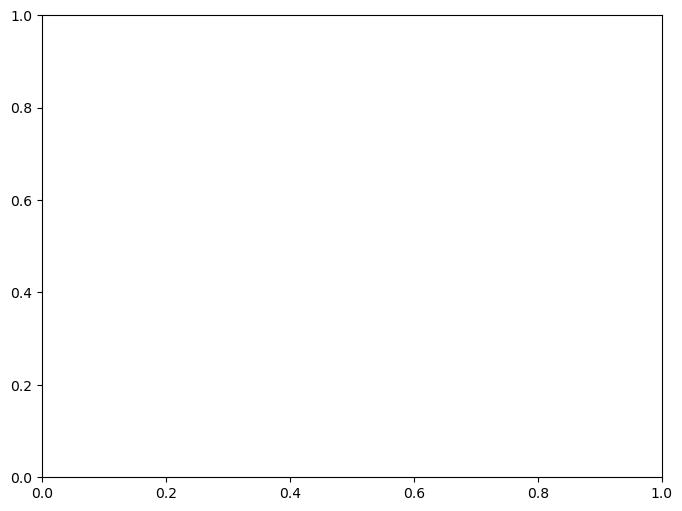

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8, 6))
plt.clf()
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)

plt.cla()
ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c = labels.astype(float))